# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ibnu Raju Humam
- **Email:** 26ibnurajuhumam@gmail.com
- **ID Dicoding:** MC223D5Y0349

## Menentukan Pertanyaan Bisnis

- Pada musim apa yang mengalami peningkatan penyewa tertinggi dari 2011 ke 2012, dan konstribusi apa yang mendorong pertumbuhan tersebut (casual/registered)?
- Pada bulan apa yang konsisten naik dalam penyewaan sepeda selama dua tahun berturut-turut (tahun 2011 ke 2012), dan faktor apa yang memengaruhinya?

## Import Semua Packages/Library yang Digunakan

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Bike Sharing Dataset terdiri dari dua dataset csv yakni mengenai informasi jumlah sepeda sewaan per jam dan per hari antara tahun 2011 dan 2012 di the Capital bike share system dengan informasi cuaca dan Season yang sesuai. Berdasarkan daftar pertanyaan bisnis yang ditanyakan, maka dataset yang digunakan adalah hanya dataset day.csv.

### Gathering Data

In [19]:
# Memuat tabel day.csv
df_day = pd.read_csv('Bike Sharing Dataset\day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
# Memuat tabel hour.csv
df_hour = pd.read_csv('Bike Sharing Dataset\hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kedua dataset, day.csv dan hour.csv, memiliki kolom atau field yang sama, kecuali kolom hr hanya tersedia dalam data hour.csv
- Untuk menyesuaikan data yang digunakan dalam analisi ini, dataset yang digunakan hanya dataset day.csv.
- Terdapat informasi tanggala penyewaan, Season serta kondisi cuacanya, Year, bulan dan lain-lain yang bisa diamati pada data frame df_day

### Assessing Data

#### Dataset day.csv

In [21]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [22]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [24]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Terdapat kesalahan tipe data yang digunakan pada kolom dteday, seharusnya bertipe datetime, namun masih bertipe object
- Tidak ada data kosong di setiap instance
- Tidak ada data duplikat dalam data
- Season atau season diwakilkan dengan kode berikut; 1 untuk springer/Season semi, 2 untuk summer/musim panas, 3 untuk fall/musim gugur, dan 4 untuk winter/musim dingin
- Year atau yr diwakilkan dengan kode berikut; 0 untuk Year 2011, dan 1 untuk Year 2012
- Bulan atau mnth diwakilkan dengan kode berikut;  1 untuk Januari, 2 untuk Februari, 3 untuk Maret, 4 untuk April, 5 untuk Mei, 6 untuk Juni, 7 untuk Juli, 8 untuk Agustus, 9 untuk September, 10 untuk Oktober, 11 untuk November, 12 untuk Desember

### Cleaning Data

In [25]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Berdasarkan assessing data, yang perlu dilakuka yakni mengkonversi tipe data dteday menjadi datetime. Dan pada tahapan ini, hal ini sudah dilakukan.

## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Kode ini digunakan untuk keperluan konversi terkait season, year, dan month

In [27]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
    }

year_map = {
    0: 2011,
    1: 2012
    }

month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
    }

month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

### Analisis Penyewa Sepeda per Musim dan Tahun

In [28]:
result_season = df_day.groupby(['season', 'yr']).agg({
    'dteday': 'count',
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

result_season['season'] = result_season['season'].map(season_map)
result_season['yr'] = result_season['yr'].map(year_map)

result_season['cnt'] = result_season['casual'] + result_season['registered']
result_season.columns = ['Season', 'Year', 'Total_Days', 'Casual', 'Registered', 'Total_Rental']
result_season[['Casual', 'Registered', 'Total_Rental']] = result_season[['Casual', 'Registered', 'Total_Rental']].applymap(lambda x: f"{x:,}")

print("Analisis Penyewa Sepeda per Musim dan Tahun:")
print(result_season.to_string(index=False))

Analisis Penyewa Sepeda per Musim dan Tahun:
Season  Year  Total_Days  Casual Registered Total_Rental
Spring  2011          90  21,425    128,575      150,000
Spring  2012          91  39,197    282,151      321,348
Summer  2011          92  77,564    269,752      347,316
Summer  2012          92 125,958    445,315      571,273
  Fall  2011          94  95,450    324,200      419,650
  Fall  2012          94 130,641    510,838      641,479
Winter  2011          89  52,813    273,324      326,137
Winter  2012          89  76,969    438,507      515,476


C:\Users\26man\AppData\Local\Temp\ipykernel_18340\2270116454.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_season[['Casual', 'Registered', 'Total_Rental']] = result_season[['Casual', 'Registered', 'Total_Rental']].applymap(lambda x: f"{x:,}")


### Analisis Penyewa Sepeda per Bulan dan Tahun

In [29]:
result_month = df_day.groupby(['mnth', 'yr']).agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

result_month['mnth'] = result_month['mnth'].map(month_map)
result_month['yr'] = result_month['yr'].map(year_map)

result_month['cnt'] = result_month['casual'] + result_month['registered']
result_month.columns = ['Month', 'Year', 'Casual', 'Registered', 'Total_Rental']
result_month[['Casual', 'Registered', 'Total_Rental']] = result_month[['Casual', 'Registered', 'Total_Rental']].applymap(lambda x: f"{x:,}")

print("Analisis Penyewa Sepeda per Bulan dan Tahun:")
print(result_month.to_string(index=False))

Analisis Penyewa Sepeda per Bulan dan Tahun:
Month  Year Casual Registered Total_Rental
  Jan  2011  3,073     35,116       38,189
  Jan  2012  8,969     87,775       96,744
  Feb  2011  6,242     41,973       48,215
  Feb  2012  8,721     94,416      103,137
  Mar  2011 12,826     51,219       64,045
  Mar  2012 31,618    133,257      164,875
  Apr  2011 22,346     72,524       94,870
  Apr  2012 38,456    135,768      174,224
  May  2011 31,050    104,771      135,821
  May  2012 44,235    151,630      195,865
  Jun  2011 30,612    112,900      143,512
  Jun  2012 43,294    159,536      202,830
  Jul  2011 36,452    104,889      141,341
  Jul  2012 41,705    161,902      203,607
  Aug  2011 28,842    107,849      136,691
  Aug  2012 43,197    171,306      214,503
  Sep  2011 26,545    100,873      127,418
  Sep  2012 43,778    174,795      218,573
  Oct  2011 25,222     98,289      123,511
  Oct  2012 34,538    164,303      198,841
  Nov  2011 15,594     86,573      102,167
  Nov  20

C:\Users\26man\AppData\Local\Temp\ipykernel_18340\2186543574.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_month[['Casual', 'Registered', 'Total_Rental']] = result_month[['Casual', 'Registered', 'Total_Rental']].applymap(lambda x: f"{x:,}")


### Insight

**Insight:**
- Musim Gugur (Fall) menjadi periode dengan penyewaan tertinggi baik di 2011 (419,650) maupun 2012 (641,479)
- Musim Dingin (Winter) memiliki penyewaan terendah, terutama di Januari (38,189 di 2011), mungkin karena faktor cuaca ekstrem.
- Pengguna terbanyak didominasi oleh registered users, sehingga bisa fokus terhadap registered users


## Visualization & Explanatory Analysis

### Pertanyaan 1:

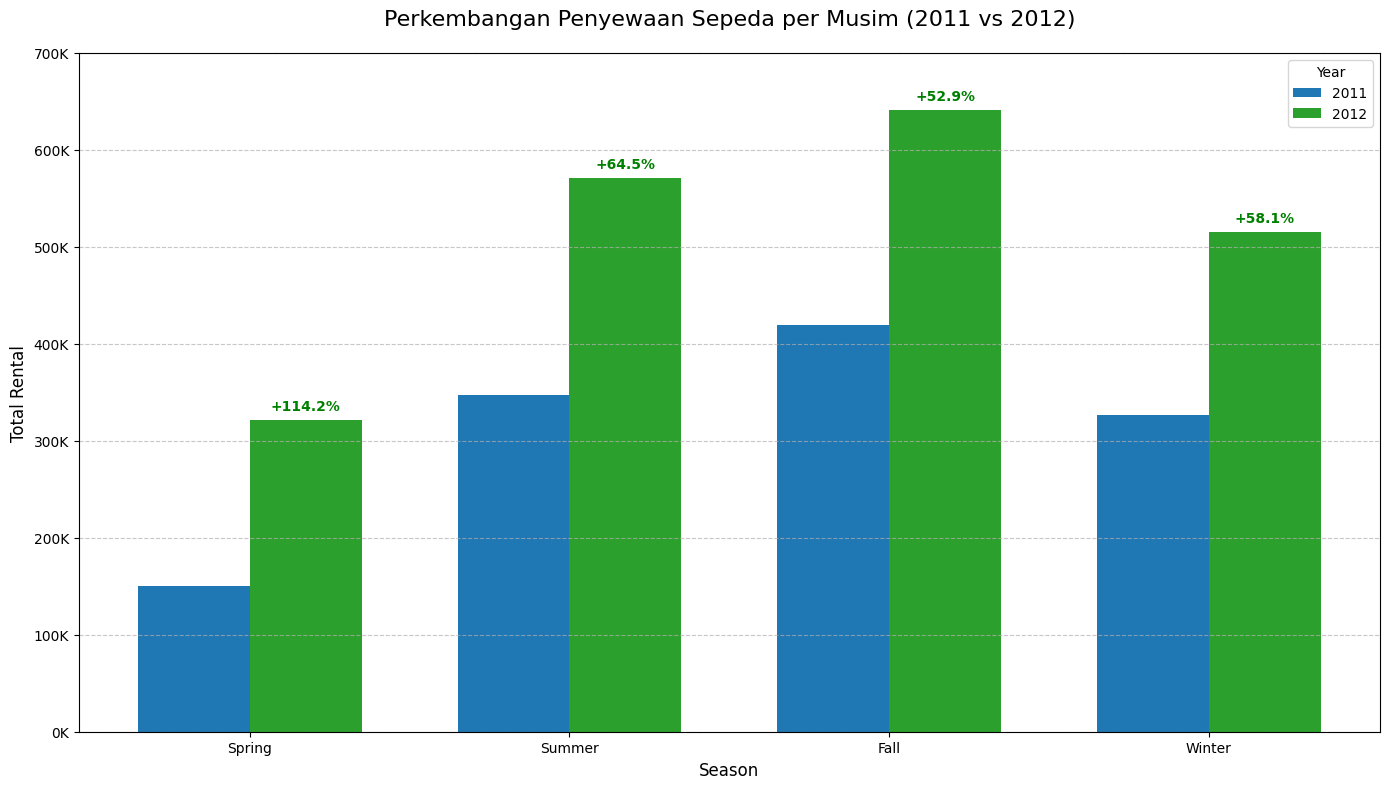

In [30]:
result_season['Total_Rental'] = result_season['Casual'].str.replace(',','').astype(int) + \
                                result_season['Registered'].str.replace(',','').astype(int)
years = sorted(result_season['Year'].unique())
seasons = result_season['Season'].unique()
colors = ['#1f77b4', '#2ca02c']

plt.figure(figsize=(14, 8))
x = np.arange(len(seasons))
width = 0.35

for i, year in enumerate(years):
    data = result_season[result_season['Year'] == year]['Total_Rental']
    plt.bar(x + (i*width), data, width, label=f'{year}', color=colors[i])
    
    # untuk mengetahui pertumbuhan penyewa sepeda dari tahun sebelumnya
    if year == 2012:
        for j, val in enumerate(data):
            growth = ((val - result_season[(result_season['Year']==2011)&(result_season['Season']==seasons[j])]['Total_Rental'].values[0])/
                     result_season[(result_season['Year']==2011)&(result_season['Season']==seasons[j])]['Total_Rental'].values[0])*100
            plt.text(x[j] + (i*width), val+10000, 
                    f'+{growth:.1f}%', 
                    ha='center', 
                    color='green',
                    fontweight='bold')

plt.title('Perkembangan Penyewaan Sepeda per Musim (2011 vs 2012)', fontsize=16, pad=20)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.xticks(x + width/2, ['Spring', 'Summer', 'Fall', 'Winter'])
plt.ylim(0, 700000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

plt.legend(title='Year', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

### Pertanyaan 2:

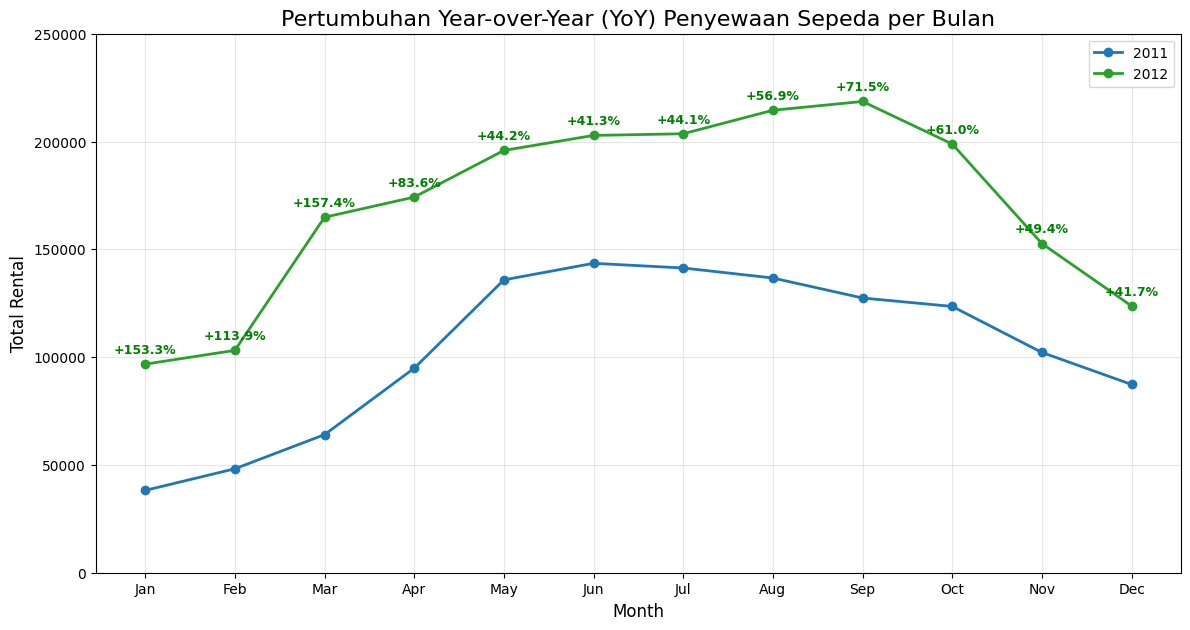

In [31]:
result_month[['Casual','Registered','Total_Rental']] = result_month[['Casual','Registered','Total_Rental']]\
.replace(',','', regex=True).astype(int)

result_month['Month'] = pd.Categorical(
    result_month['Month'], 
    categories=month_order, 
    ordered=True
)

result_month = result_month.sort_values('Month')

pivot_month = result_month.pivot(index='Month', columns='Year', values='Total_Rental')

plt.figure(figsize=(14,7))
plt.plot(pivot_month.index, pivot_month[2011], marker='o', label='2011', color='#1f77b4', linewidth=2)
plt.plot(pivot_month.index, pivot_month[2012], marker='o', label='2012', color='#2ca02c', linewidth=2)

for bulan in pivot_month.index:
    y2011 = pivot_month.loc[bulan, 2011]
    y2012 = pivot_month.loc[bulan, 2012]
    growth = ((y2012 - y2011)/y2011)*100
    plt.text(bulan, y2012+5000, f'+{growth:.1f}%', 
             ha='center', color='green' if growth>0 else 'red', 
             fontsize=9, fontweight='bold')

plt.title('Pertumbuhan Year-over-Year (YoY) Penyewaan Sepeda per Bulan', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Rental', fontsize=12)
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylim(0, 250000)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [32]:
# pivot_month

### Insight

**Insight:**
Visualisasi 1
- Jumlah penyewa meningkat secara signifikan di setiap musim dari tahun 2011 ke 2012
- Musin semi (Spring) menampilkan loncatan tertinggi, yaitu +114,2% penyewa dibanding tahun sebelumnya, kemudian disusul summer, winter, dan fall masing-masing +64,5%, +58,1% dan +52,9%.
- Musim panas dan musim gugur tetap menjadi puncak penyewaan, tetapi musim semi menunjukkan lonjakan paling drastis.
- Musim dingin tetap menjadi musim dengan jumlah penyewa lebih rendah, meskipun mengalami peningkatan.

Visualisasi 2
- Terjadi lonjakan penyewa di awal tahun 2012. Januari mengalami kenaikan sebesar +153,3%, Februari naik +113,3%, serta Maret naik 157,4%. Hal ini menandakan meningkatnya peminat penggunaan rental sepeda.
- Penurunan tren di akhir tahun yakni Oktober, November, dan Desember. Walaupun meningkat dibanding tahun sebelumnya, pertumbuhan pada bulan ini lebih rendah dibandingkan bulan-bulan sebelumnya.


## Analisis Lanjutan (Opsional)

## Conclusion

Conclution pertanyaan 1
- Musim Gugur (Fall) menjadi periode dengan penyewaan tertinggi baik pada tahun 2011 maupun 2012.
- Musim Dingin (Winter) memiliki jumlah penyewa paling rendah, terutama di bulan Januari, kemungkinan besar akibat kondisi cuaca ekstrem.
- Secara keseluruhan, terdapat peningkatan signifikan dalam jumlah penyewa di setiap musim dari tahun 2011 ke 2012, dengan musim semi (Spring) mengalami lonjakan tertinggi sebesar 114,2%, menunjukkan adanya peningkatan minat atau faktor eksternal yang mendorong pertumbuhan ini.
- Meskipun musim panas dan gugur tetap menjadi puncak penyewaan, musim semi menunjukkan peningkatan yang sangat drastis.

Conclution pertanyaan 2
- Penyewaan sepeda mengalami tren pertumbuhan positif dari tahun 2011 ke 2012, terutama pada awal tahun.
- Lonjakan signifikan terjadi di Januari (+153,3%), Februari (+113,3%), dan Maret (+157,4%), menandakan meningkatnya peminat rental sepeda di awal tahun 2012.
- Tren pertumbuhan mulai melambat pada bulan Oktober, November, dan Desember, meskipun jumlah penyewaan masih lebih tinggi dibandingkan tahun sebelumnya.
- Secara umum, pertumbuhan ini menunjukkan peningkatan popularitas penyewaan sepeda, yang bisa dikaitkan dengan faktor eksternal seperti promosi, perbaikan infrastruktur, atau peningkatan kesadaran masyarakat akan manfaat bersepeda.

Kesimpulannya dapat menyusun strategi pemasaran di musim dingin atau winter, untuk membantu meningkatkan penyewaan di musim ini.

In [33]:
# df_day.to_csv("df_day.csv", index=False)